<a href="https://colab.research.google.com/github/DiegoAT11/module1_activities_DiegoAguilarTorres/blob/main/PrediccionEcobici.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import io
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/Colab 6 Semestre/Jesus/2025-01.csv'

# Leer CSV en DataFrame
df_raw = pd.read_csv(file_path)
print("Tamaño del dataframe")
print(df_raw.shape)

#Mostrar una preview de los datos
print("Preview del dataframe")
display(df_raw.head(50))

Mounted at /content/drive
Tamaño del dataframe
(1809775, 9)
Preview del dataframe


,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_EstacionArribo,Fecha_Arribo,Hora_Arribo
0,M,26.0,5180930,568,31/12/2024,23:57:02,572,01/01/2025,00:00:03
1,F,54.0,3653953,283,31/12/2024,23:51:40,596,01/01/2025,00:00:41
2,M,38.0,7511322,034,31/12/2024,23:48:36,064,01/01/2025,00:00:59
3,M,41.0,3804572,258,31/12/2024,23:54:11,023,01/01/2025,00:01:08
4,M,35.0,3848405,043,31/12/2024,23:35:28,126,01/01/2025,00:01:17
5,M,24.0,7579436,222,31/12/2024,23:34:33,483,01/01/2025,00:01:58
6,M,31.0,7161920,034,31/12/2024,23:25:47,688,01/01/2025,00:02:16
7,M,22.0,7220593,254,31/12/2024,23:50:20,539,01/01/2025,00:02:41
8,M,29.0,4031258,560,31/12/2024,23:52:11,120,01/01/2025,00:03:28
9,F,24.0,6463376,560,31/12/2024,23:51:50,120,01/01/2025,00:03:31


In [ ]:
#Copia para no modificar el dataframe original
df = df_raw.copy()

print("\nTipos de datos antes de la conversión a datetime:")
print(df[['Fecha_Retiro', 'Fecha_Arribo']].dtypes)

#Nueva columna con fecha y hora en formato datetime
df["Retiro_Datetime"] = pd.to_datetime(df["Fecha_Retiro"] + " " + df["Hora_Retiro"], format="%d/%m/%Y %H:%M:%S")
df["Arribo_Datetime"] = pd.to_datetime(df["Fecha_Arribo"] + " " + df["Hora_Arribo"], format="%d/%m/%Y %H:%M:%S")


print(df[['Retiro_Datetime', 'Arribo_Datetime']].dtypes)

display(df.head())


Tipos de datos antes de la conversión a datetime:
Fecha_Retiro    object
Fecha_Arribo    object
dtype: object
Retiro_Datetime    datetime64[ns]
Arribo_Datetime    datetime64[ns]
dtype: object


,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_EstacionArribo,Fecha_Arribo,Hora_Arribo,Retiro_Datetime,Arribo_Datetime
0,M,26.0,5180930,568,31/12/2024,23:57:02,572,01/01/2025,00:00:03,2024-12-31 23:57:02,2025-01-01 00:00:03
1,F,54.0,3653953,283,31/12/2024,23:51:40,596,01/01/2025,00:00:41,2024-12-31 23:51:40,2025-01-01 00:00:41
2,M,38.0,7511322,034,31/12/2024,23:48:36,064,01/01/2025,00:00:59,2024-12-31 23:48:36,2025-01-01 00:00:59
3,M,41.0,3804572,258,31/12/2024,23:54:11,023,01/01/2025,00:01:08,2024-12-31 23:54:11,2025-01-01 00:01:08
4,M,35.0,3848405,043,31/12/2024,23:35:28,126,01/01/2025,00:01:17,2024-12-31 23:35:28,2025-01-01 00:01:17


In [ ]:
# Verificar valores nulos en todas las columnas
print("\nConteo de valores nulos por columna:")
print(df.isnull().sum())

#Eliminar valores nulos en Edad_Usuario ya que es una porción pequeña del dataset
df.dropna(subset=["Edad_Usuario"], inplace=True)
# Verificar valores nulos en todas las columnas
print("\nConteo de valores nulos por columna:")
print(df.isnull().sum())


Conteo de valores nulos por columna:
Genero_Usuario             1
Edad_Usuario             147
Bici                       0
Ciclo_Estacion_Retiro      0
Fecha_Retiro               0
Hora_Retiro                0
Ciclo_EstacionArribo       0
Fecha_Arribo               0
Hora_Arribo                0
Retiro_Datetime            0
Arribo_Datetime            0
dtype: int64

Conteo de valores nulos por columna:
Genero_Usuario           0
Edad_Usuario             0
Bici                     0
Ciclo_Estacion_Retiro    0
Fecha_Retiro             0
Hora_Retiro              0
Ciclo_EstacionArribo     0
Fecha_Arribo             0
Hora_Arribo              0
Retiro_Datetime          0
Arribo_Datetime          0
dtype: int64


In [ ]:
# Imputar valores "?" en la columna "Genero_Usuario" con la constante "O(Other)"
df["Genero_Usuario"] = df["Genero_Usuario"].replace("?", "O")

# Imprimir la cantidad de cada variable categórica en 'genero'
print("\nConteo de viajes por género:")
print(df["Genero_Usuario"].value_counts())


Conteo de viajes por género:
Genero_Usuario
M    1252749
F     502211
O      54668
Name: count, dtype: int64


In [ ]:
#Aplicamos One-Hot Encoding a la columna "Genero_Usuario"
df_encoded = pd.get_dummies(df, columns=["Genero_Usuario"], prefix=["Genero_Usuario"])

# Mostrar las primeras filas del DataFrame codificado
print("\nDataFrame después de One-Hot Encoding:")
display(df_encoded.head())


DataFrame después de One-Hot Encoding:


,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_EstacionArribo,Fecha_Arribo,Hora_Arribo,Retiro_Datetime,Arribo_Datetime,Genero_Usuario_F,Genero_Usuario_M,Genero_Usuario_O
0,26.0,5180930,568,31/12/2024,23:57:02,572,01/01/2025,00:00:03,2024-12-31 23:57:02,2025-01-01 00:00:03,False,True,False
1,54.0,3653953,283,31/12/2024,23:51:40,596,01/01/2025,00:00:41,2024-12-31 23:51:40,2025-01-01 00:00:41,True,False,False
2,38.0,7511322,034,31/12/2024,23:48:36,064,01/01/2025,00:00:59,2024-12-31 23:48:36,2025-01-01 00:00:59,False,True,False
3,41.0,3804572,258,31/12/2024,23:54:11,023,01/01/2025,00:01:08,2024-12-31 23:54:11,2025-01-01 00:01:08,False,True,False
4,35.0,3848405,043,31/12/2024,23:35:28,126,01/01/2025,00:01:17,2024-12-31 23:35:28,2025-01-01 00:01:17,False,True,False


In [ ]:
# Columna Target (Viajes de más de 1 hora)
df_encoded["target"] = (((df_encoded["Arribo_Datetime"] - df_encoded["Retiro_Datetime"]).dt.total_seconds() / 60) > 60).astype(int)
display(df_encoded.head())

,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_EstacionArribo,Fecha_Arribo,Hora_Arribo,Retiro_Datetime,Arribo_Datetime,Genero_Usuario_F,Genero_Usuario_M,Genero_Usuario_O,target
0,26.0,5180930,568,31/12/2024,23:57:02,572,01/01/2025,00:00:03,2024-12-31 23:57:02,2025-01-01 00:00:03,False,True,False,0
1,54.0,3653953,283,31/12/2024,23:51:40,596,01/01/2025,00:00:41,2024-12-31 23:51:40,2025-01-01 00:00:41,True,False,False,0
2,38.0,7511322,034,31/12/2024,23:48:36,064,01/01/2025,00:00:59,2024-12-31 23:48:36,2025-01-01 00:00:59,False,True,False,0
3,41.0,3804572,258,31/12/2024,23:54:11,023,01/01/2025,00:01:08,2024-12-31 23:54:11,2025-01-01 00:01:08,False,True,False,0
4,35.0,3848405,043,31/12/2024,23:35:28,126,01/01/2025,00:01:17,2024-12-31 23:35:28,2025-01-01 00:01:17,False,True,False,0


In [ ]:
#Ver número de viajes mayores a 60 minutos(1) y menores a 60(0)
print(df_encoded["target"].value_counts())

target
0    1802604
1       7024
Name: count, dtype: int64


In [ ]:
#Usamos LabelEncoder para el manejo de los rangos que pueda haber dentro de "Ciclo_Estacion_Retiro" y "Ciclo_Estacion_Arribo"
le_retiro = LabelEncoder()
df_encoded["Ciclo_Estacion_Retiro"] = le_retiro.fit_transform(df_encoded["Ciclo_Estacion_Retiro"])

le_arribo = LabelEncoder()
df_encoded["Ciclo_Estacion_Arribo"] = le_arribo.fit_transform(df_encoded["Ciclo_EstacionArribo"])

In [ ]:
#Se crean dos nuevas columnas para posterior uso en la predicción
df_encoded["hora_retiro"] = df["Retiro_Datetime"].dt.hour
df_encoded["dia_semana"] = df["Retiro_Datetime"].dt.dayofweek
display(df_encoded.head())

,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_EstacionArribo,Fecha_Arribo,Hora_Arribo,Retiro_Datetime,Arribo_Datetime,Genero_Usuario_F,Genero_Usuario_M,Genero_Usuario_O,target,Ciclo_Estacion_Arribo,hora_retiro,dia_semana
0,26.0,5180930,533,31/12/2024,23:57:02,572,01/01/2025,00:00:03,2024-12-31 23:57:02,2025-01-01 00:00:03,False,True,False,0,538,23,1
1,54.0,3653953,271,31/12/2024,23:51:40,596,01/01/2025,00:00:41,2024-12-31 23:51:40,2025-01-01 00:00:41,True,False,False,0,562,23,1
2,38.0,7511322,33,31/12/2024,23:48:36,064,01/01/2025,00:00:59,2024-12-31 23:48:36,2025-01-01 00:00:59,False,True,False,0,63,23,1
3,41.0,3804572,251,31/12/2024,23:54:11,023,01/01/2025,00:01:08,2024-12-31 23:54:11,2025-01-01 00:01:08,False,True,False,0,22,23,1
4,35.0,3848405,42,31/12/2024,23:35:28,126,01/01/2025,00:01:17,2024-12-31 23:35:28,2025-01-01 00:01:17,False,True,False,0,124,23,1


In [ ]:
X = df_encoded.drop(columns=[
    "target", "Fecha_Retiro", "Hora_Retiro",
    "Fecha_Arribo", "Hora_Arribo",
    "Retiro_Datetime", "Arribo_Datetime",
    "Ciclo_Estacion_Retiro", "Ciclo_EstacionArribo",
])

y = df_encoded["target"]

In [ ]:
#Dividos el dataset para el test y train
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Oversampling solo en el train
ratio = 1000000 / y_train.value_counts()[0]
ros = RandomOverSampler(sampling_strategy=ratio, random_state=42)
X_train_res, y_train_res = ros.fit_resample(X_train, y_train)

print("Distribución train antes:\n", y_train.value_counts())
print("Distribución train después:\n", y_train_res.value_counts())

print("Distribución test (sin oversampling):\n", y_test.value_counts())


Distribución train antes:
 target
0    1442083
1       5619
Name: count, dtype: int64
Distribución train después:
 target
0    1442083
1    1000000
Name: count, dtype: int64
Distribución test (sin oversampling):
 target
0    360521
1      1405
Name: count, dtype: int64


In [ ]:
# Función para ver la matriz de confusión
def plot_confusion_matrix(conf_matrix, model_name):
    plt.figure(figsize=(4, 3))
    sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
    plt.title(f'Matriz de Confusión para {model_name}')
    plt.xlabel('Predicción')
    plt.ylabel('Real')
    plt.show()

# Función para entrenar y evaluar un modelo
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    TN, FP, FN, TP = conf_matrix.ravel()

    return accuracy, precision, recall, f1, TN, FP, FN, TP

Accuracy: 0.9959
Precision: 0.1134
Recall: 0.0078
F1-score: 0.0146
TN: 360435, FP: 86, FN: 1394, TP: 11


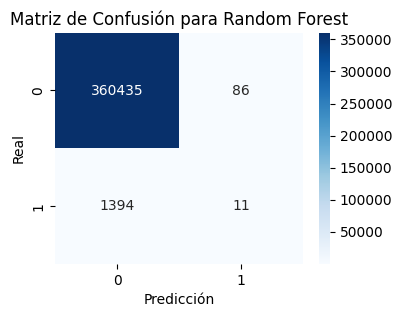

In [ ]:
model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

accuracy, precision, recall, f1, TN, FP, FN, TP = evaluate_model(
    model, X_train_res, y_train_res, X_test, y_test
)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"TN: {TN}, FP: {FP}, FN: {FN}, TP: {TP}")
conf_matrix = np.array([[TN, FP], [FN, TP]])
plot_confusion_matrix(conf_matrix, "Random Forest")

text size rango en 0.2 o 0.3

**Usar regresion para predecir la duración del viaje**



In [38]:
#Duración del viaje en minutos
df_encoded["duracion_minutos"] = (df_encoded["Arribo_Datetime"] - df_encoded["Retiro_Datetime"]).dt.total_seconds() / 60

#Duración hasta 60 minutos
df_encoded = df_encoded[df_encoded["duracion_minutos"].between(1, 60)]


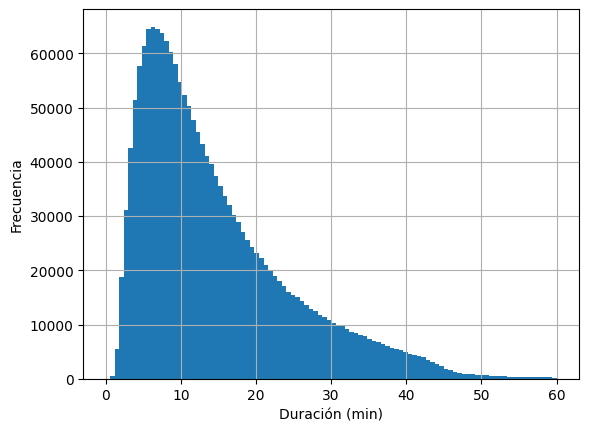

In [39]:
df_encoded["duracion_minutos"].hist(bins=100, range=(0,60))
plt.xlabel("Duración (min)")
plt.ylabel("Frecuencia")
plt.show()

In [40]:
# Transformamos target con log (para reducir el sesgo)
df_encoded["duracion_log"] = np.log1p(df_encoded["duracion_minutos"])

In [43]:
# Se quitan columnas que no consideremos usar para la predicción
X_reg = df_encoded.drop(columns=[
    "Fecha_Retiro", "Hora_Retiro",
    "Fecha_Arribo", "Hora_Arribo",
    "Retiro_Datetime", "Arribo_Datetime",
    "Ciclo_Estacion_Retiro", "Ciclo_EstacionArribo",
    "duracion_minutos", "duracion_log", "target"
])

# Target
y_reg = df_encoded["duracion_log"]

In [44]:
#Train / test
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

#Modelo
model_reg = RandomForestRegressor(
    n_estimators=100,
    max_depth=20,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=-1
)
model_reg.fit(X_train_reg, y_train_reg)


RandomForestRegressor(max_depth=20, min_samples_leaf=5, n_jobs=-1,
                      random_state=42)

In [45]:
#Predicción
y_pred_log = model_reg.predict(X_test_reg)

# Se revierte log para tener la predicción en minutos
y_pred_reg = np.expm1(y_pred_log)
y_test_actual = np.expm1(y_test_reg)

In [46]:
mse = mean_squared_error(y_test_actual, y_pred_reg)
mae = mean_absolute_error(y_test_actual, y_pred_reg)
r2 = r2_score(y_test_actual, y_pred_reg)

print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R2: {r2:.4f}")

MSE: 95.97
MAE: 7.03
R2: 0.0429


In [53]:
# Crear DataFrame con resultados
df_comparacion = pd.DataFrame({
    "Duracion_real": y_test_actual,
    "Duracion_predicha": y_pred_reg
})

display(df_comparacion.head(20))

,Duracion_real,Duracion_predicha
246788,3.633333,10.755676
998242,9.100000,10.876196
245016,29.783333,12.179633
1621110,12.416667,8.262021
207221,9.000000,12.657660
689484,6.100000,14.274957
610428,9.516667,12.157546
1596307,13.200000,8.103511
1677926,16.333333,13.577772
1783739,17.683333,12.419944


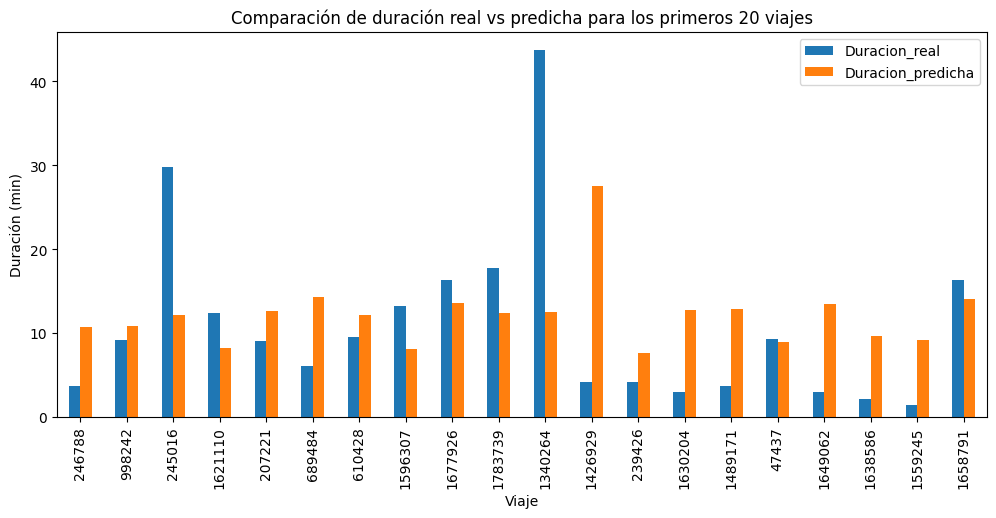

In [54]:
# Mostramos los resultados en una gráfica de barras
N = 20
df_comparacion.head(N).plot(kind='bar', figsize=(12,5))
plt.xlabel("Viaje")
plt.ylabel("Duración (min)")
plt.title(f"Comparación de duración real vs predicha para los primeros {N} viajes")
plt.show()